<a href="https://colab.research.google.com/github/rpenal/Algoritmos2022-I/blob/main/LAB6/LAB6GR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Perceptron simple




In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from google.colab import files
pd.set_option('display.max_columns', 500)

#2. Definición de la clase perceptron 



In [2]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = float(eta)
        self.n_iter = n_iter

    def train(self, X, y):
        # inicializar los pesos en 0
        self.w = np.zeros(len(X[0])+1)
        #vector de errores acumulados
        self.errors = []

        #ciclo de entrenamiento
        for i in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X,y):
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i
                #actualizar el valor del bias
                self.w[0] += delta_w
                if (delta_w!=0):
                    errors += 1
            self.errors.append(errors)
 

    def predict(self, X):
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0]
        #funcion de activación 
        if v > 0.0:
            return 1
        return 0

In [3]:
#cargar los archivos de los dataset
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer(as_frame=True)
data = pd.DataFrame(df.frame)

# 3.Leer el datset Breast Cancer de Wisconsin

El dataset cáncer es un conjunto de datos clásico y muy fácil para clasificación binaria. Contiene datos de imagenes digitalizadas de biopsias por aspiración con aguja fina de masas mamarias.


Conformado por 2 clases, tumor maligno y tumor benigno. 212 datos de cáncer maligno y 357 de cáncer benigno.

Mayor información del dataset se encuentra en  https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset


En el conjunto de datos 0 en el Target se identifica como Maligno y 1 como Benigno, ya estaban categorizadas desde su carga.

In [4]:
#cargar los archivos del dataset
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)
df = pd.DataFrame(df.frame)
print("Primeros valores del dataset")
display(df.head(100))

Primeros valores del dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,0.7576,1.5090,4.554,87.87,0.006016,0.03482,0.042320,0.012690,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,0.3350,2.0430,2.132,20.05,0.011130,0.01463,0.005308,0.005250,0.01801,0.005667,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,0.2315,0.5391,1.475,15.75,0.006153,0.01330,0.016930,0.006884,0.01651,0.002551,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


In [5]:
#Almacenaremos en X como Numpy Array todas las features del dataset
X = np.array(df.drop('target',axis=1), float)
#Almacenaremos en Y como Numpy Array nuestra columna target
Y = np.array(df["target"])

# 4. Selección de datos

## Analizaremos los resultados para 3 escenarios de conjuntos de features:

a) Conjunto $X_1$, features "Mean Smothness" y "Worst Concave Points". **Separable Lineal**

b) Conjunto $X_2$, features "Mean Simmetry" y "Mean Fractal Dimension". **No separable lineal**

c) Conjunto $X$, todas las features

### **4.1. Selección de las 2 mejores features y que además son más separables linealmente**

Con ayuda de Scikit-Learn y el módulo SelectPercentile y la función de Score ANOVA-F reduciremos la dimensionalidad a los 2 mejores features, para poder ver la separabilidad de los datos de manera gráfica.

In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Conjunto de datos X_1 con las mejores features de acuerdo con el algoritmo de reducción de dimensionalidad de Scikit
X_1 = SelectKBest(mutual_info_classif, k=2).fit_transform(X,Y)
X_1

array([[ 184.6 , 2019.  ],
       [ 158.8 , 1956.  ],
       [ 152.5 , 1709.  ],
       ...,
       [ 126.7 , 1124.  ],
       [ 184.6 , 1821.  ],
       [  59.16,  268.6 ]])

En este caso, como podemos observar las 2 features más importantes según el resultado del algoritmo son "Mean Smothness" y "Worst Concave Points".

A continuación crearemos una máscara booleana para filtrar los datos según la malignidad del tumor y graficaremos para ver la separabilidad de los datos.

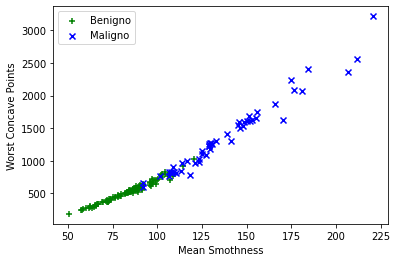

In [ ]:
# Datos con tumor benigno
wo_cancer = X_1[Y==1][0:100]
# Datos con tumor maligno
wt_cancer = X_1[Y==0][50:100]

#Graficamos el conjunto de datos
plt.xlabel("Mean Smothness")
plt.ylabel("Worst Concave Points")
plt.scatter(wo_cancer[:, 0], wo_cancer[:, 1], color='green', marker='+',label="Benigno")
plt.scatter(wt_cancer[:, 0], wt_cancer[:, 1], color='blue', marker='x',label="Maligno")
plt.legend(loc='upper left')
plt.show()

Por lo tanto el conjunto de datos $X_1$ con las features features "Mean Smothness" y "Worst Concave Points", muestra indicios de ser separable linealmente.

### **4.2. Dos features que bajo la exploración de los datos encontramos como las menos separables linealmente"**

Después de realizar los gráficos de correlación de varios conjuntos posibles de 2 features, notamos que "Mean Simmetry" y "Mean Fractal Dimension" eran las features que menos mostraban ser separables linealmente.

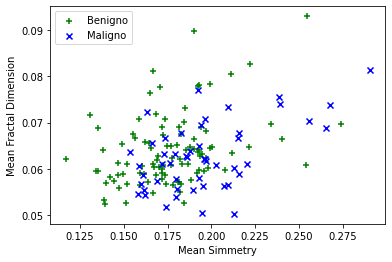

In [8]:
#Seleccionamos del conjunto de datos unicamente las features Mean Simmetry y Mean Fractal
X_2 = X[:,[8,9]]

# Datos con tumor benigno
wo_cancer = X_2[Y==1][0:100]
# Datos con tumor maligno
wt_cancer = X_2[Y==0][50:100]

plt.xlabel("Mean Simmetry")
plt.ylabel("Mean Fractal Dimension")
plt.scatter(wo_cancer[:, 0], wo_cancer[:, 1], color='green', marker='+',label="Benigno")
plt.scatter(wt_cancer[:, 0], wt_cancer[:, 1], color='blue', marker='x',label="Maligno")
plt.legend(loc='upper left')
plt.show()

Por lo tanto el conjunto de datos $X_2$ con las features features "Mean Simmetry" y "Mean Fractal Dimension", no muestra indicios de ser separable linealmente.

# Entrenamiento y prueba del perceptron

Se toma el 80% del dataset para entrenar el perceptron.


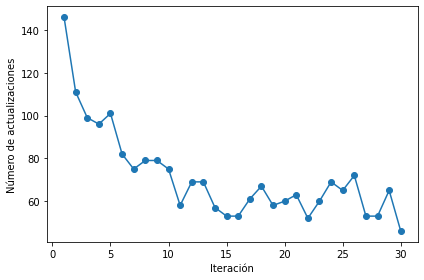

error = 6.25%


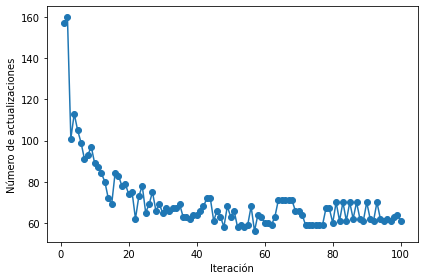

error = 8.928571428571429%


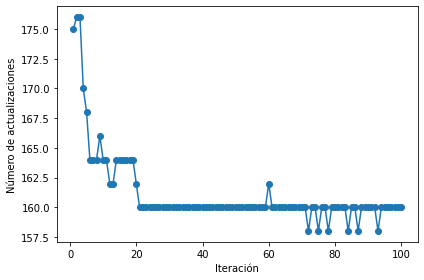

error = 33.92857142857143%


In [12]:
def entrenar_perceptron(X,Y,n_iter):
  tamano = X.shape[0]

  fortyper = int(tamano * .4)
  fiftyper = int(tamano * .5)
  ninetyper = int(tamano* .9)

  datapractice = np.concatenate([X[:fortyper,:],X[fiftyper:ninetyper,:]],axis=0)
  resultspractice = np.concatenate([Y[:fortyper],Y[fiftyper:ninetyper]],axis=0)

  ##ENTRENAMIENTO##
  #tomar el 80 % del dataset para el entrenamiento
  X_training = datapractice
  y_training = resultspractice
  #entrenar el perceptron
  perceptron =  Perceptron(2,n_iter)
  perceptron.train(X_training, y_training)

  plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
  plt.xlabel('Iteración')
  plt.ylabel('Número de actualizaciones')

  plt.tight_layout()
  plt.show()

  ##PRUEBA##
  #Tomar el 20% restante del dataset para probar el perceptron´
  X_test = np.concatenate([X[fortyper+1:fiftyper,:],X[ninetyper+1:,:]],axis=0)
  y_test = np.concatenate([Y[fortyper+1:fiftyper],Y[ninetyper+1:]],axis=0)

  #calcular los errores en la clasificacion 
  error = 0
  for i in range(0,len(X_test)):
      if perceptron.predict(X_test[i]) != y_test[i]:
          error += 1 
  error = error / len(X_test) * 100
  print("error = {}%".format(error))

entrenar_perceptron(X,Y,n_iter=30)
entrenar_perceptron(X_1,Y,n_iter=100)
entrenar_perceptron(X_2,Y,n_iter=100)

In [41]:
###Cambiando n_iter
class Perceptron_while:
    def __init__(self, eta=0.1, tol = 10):
        self.eta = float(eta)
        self.tol = tol

    def train(self, X, y):
        # inicializar los pesos en 0
        self.w = np.zeros(len(X[0])+1)
        #vector de errores acumulados
        self.errors = []

        error = self.tol+1
        #ciclo de entrenamiento
        while error > self.tol:
            error = 0
            for x_i, target in zip(X,y):
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i
                #actualizar el valor del bias
                self.w[0] += delta_w
                if (delta_w!=0):
                    error += 1
            self.errors.append(error)
 

    def predict(self, X):
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0]
        #funcion de activación 
        if v > 0.0:
            return 1
        return 0

41
40


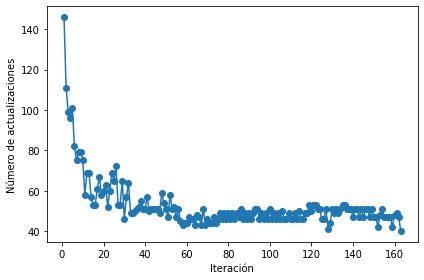

In [42]:
tamano = X.shape[0]

fortyper = int(tamano * .4)
fiftyper = int(tamano * .5)
ninetyper = int(tamano* .9)

datapractice = np.concatenate([X[:fortyper,:],X[fiftyper:ninetyper,:]],axis=0)
resultspractice = np.concatenate([Y[:fortyper],Y[fiftyper:ninetyper]],axis=0)

##ENTRENAMIENTO##
#tomar el 80 % del dataset para el entrenamiento
X_training = datapractice
y_training = resultspractice

#entrenar el perceptron
#Una tolerancia baja (aprox 30) provoca un loop infinito
perceptron = Perceptron_while(2,tol=40)
perceptron.train(X_training, y_training)


plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

In [43]:
X_test = np.concatenate([X[fortyper+1:fiftyper,:],X[ninetyper+1:,:]],axis=0)
y_test = np.concatenate([Y[fortyper+1:fiftyper],Y[ninetyper+1:]],axis=0)

#calcular los errores en la clasificacion 
error = 0
for i in range(0,len(X_test)):
    if perceptron.predict(X_test[i]) != y_test[i]:
        error += 1 
error = error / len(X_test) * 100
print("error = {}%".format(error))

error = 3.571428571428571%
